# Actividad: Distribución T-student

> Alfonso Pineda Cedillo | A01660394

**Fecha de entrega:** 23 de Agosto de 2023

---

**Instrucciones**

Resuleve el siguiente problema en Python

Un nutricionista está investigando el contenido de vitamina C en dos tipos de jugo de naranja. Tomó muestras aleatorias de cada tipo de jugo y registró los siguientes niveles promedio de vitamina C en miligramos por 100 ml:

> Tipo de jugo A: 20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23.  
Tipo de jugo B: 19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18.

Calcula un intervalo de confianza del 99% para la media poblacional del contenido de vitamina C de ambos jugos.

Pasos que debes de seguir para resolver el problema:

1. Convierte los datos en un DataFrame. Esto te ayudará a realizar tus cálculos

2. Realiza una gráfica QQ-plot para determinar si los datos siguen una distribución normal. Recuerda que por defecto el método QQ-plot compara los datos con una normal estandar. Para obtener un correcto ajuste estandariza los datos o cambia los parámetros de la gráfica QQ-plot.

3. Aplica el test de Kolmogorov Smirnov para asegurarte si los datos son o no normales. Por defecto el test Kolmogorov compara los datos con una normal estandar, cambia los parámetros o estandariza los datos.

4. En caso de que no sean normales considera que tienen una distribución t-student.

5. Calcula el intervalo de confianza de acuerdo con la distribución de los datos y el nivel de confianza solicitado.

---

## Solución

Importamos las librerías necesarias

In [27]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Realizamos la importación de datos y la creación del DataFrame.

In [21]:
# Datos
data_A = [20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23]
data_B = [19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18]

# Crear un DataFrame
df = pd.DataFrame({'Tipo_A': data_A, 'Tipo_B': data_B})

Realizamos la estandarización de los datos.

In [22]:
n = len(data_A)

df_standardized = (df - df.mean()) / (df.std() / np.sqrt(n))

Realizamos la gráfica QQ-plot para ambos tipos de jugos.

<Figure size 1000x600 with 0 Axes>

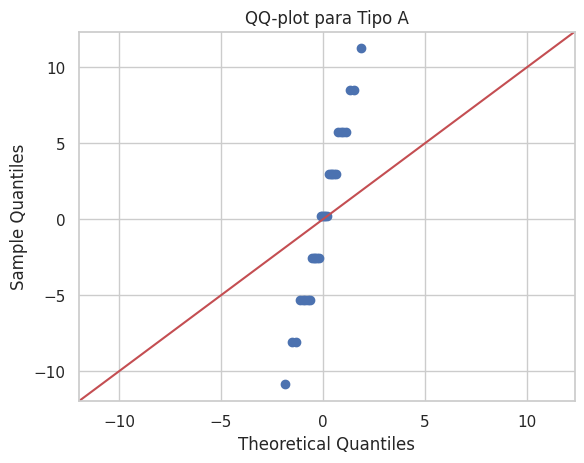

In [36]:
plt.figure(figsize=(10, 6))
sm.qqplot(df_standardized['Tipo_A'], line='45')
plt.title("QQ-plot para Tipo A")
plt.show()

<Figure size 1000x600 with 0 Axes>

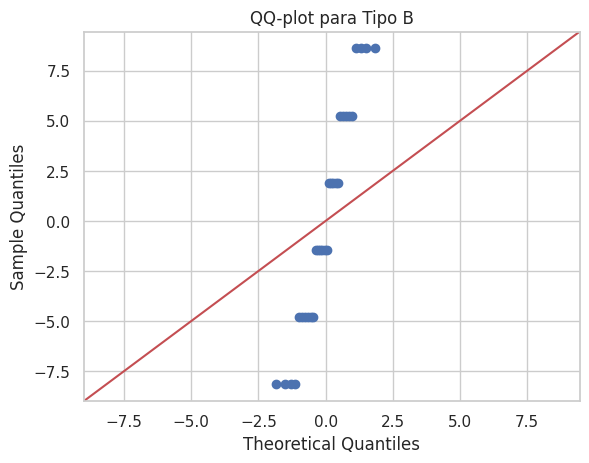

In [37]:
plt.figure(figsize=(10, 6))
sm.qqplot(df_standardized['Tipo_B'], line='45')
plt.title("QQ-plot para Tipo B")
plt.show()

En los gráfico QQ - plot obtenidos, los puntos no siguen una línea diagonal (45°), lo que sugiere que los residuos podrían no estar distribuidos de manera normal. Sin embargo, realizaremos una prueba más que nos confirme la hipótesis anterior.

Realizamos el test de Kolmogorov-Smirnov para comprobar la no normalidad de los datos.

In [38]:
ks_statistic_A, ks_p_value_A = stats.kstest(df_standardized['Tipo_A'], 'norm')
ks_statistic_B, ks_p_value_B = stats.kstest(df_standardized['Tipo_B'], 'norm')

alpha = 0.05  # Nivel de significancia

print(f"Test de Kolmogorov-Smirnov para Tipo A:\n"
      f"P-valor: {ks_p_value_A}\n"
      f"¿Los datos siguen una distribución normal? {ks_p_value_A > alpha}\n")

print(f"Test de Kolmogorov-Smirnov para Tipo B:\n"
      f"P-valor: {ks_p_value_B}\n"
      f"¿Los datos siguen una distribución normal? {ks_p_value_B > alpha}\n")

Test de Kolmogorov-Smirnov para Tipo A:
P-valor: 1.6245194483008648e-05
¿Los datos siguen una distribución normal? False

Test de Kolmogorov-Smirnov para Tipo B:
P-valor: 2.465171784639058e-06
¿Los datos siguen una distribución normal? False



De acuerdo con los resultados obtenidos en los Tests de Kolmogorov-Smirnov, los valores obtenidos son menores a 0.05, por lo que la hipótesis nula es rechazada; es decir, los datos no siguen una distribución normal.

Debido a lo anterior, consideramos que tienen una distribución t-student. Dado un nivel de confianza del 99%, calculamos el intervalo de confianza para cada tipo de jugo.

El valor crítico `z_critical` ($V_c$) tiene un valor de 2.756 obtenido desde la tabla de distribucion de T-student. Aún así, para una mayor precisión, utilizamos el método `stats.t.ppf` para calcularlo.

El intervalo de confianza está dado por:
<center>$\mu = \overline{X} \pm V_c \left(\frac{S}{\sqrt{n}}\right)$</center>

Donde:
*   $\overline{X}$ es el promedio
*   $V_c$ es el valor crítico
*   $S$ es la desviación estándar muestral
*   $n$ es el tamaño muestral



In [47]:
# Nivel de confianza
confidence_level = 0.99

# Intervalo de confianza usando distribución t-student
n_A = len(data_A)
n_B = len(data_B)

mean_A = np.mean(data_A)
squared_deviations_A = np.sum((data_A - mean_A)**2)
std_A = np.sqrt(squared_deviations_A / (n_A - 1))  # Desviación estándar muestral A

mean_B = np.mean(data_B)
squared_deviations_B = np.sum((data_B - mean_B)**2)
std_B = np.sqrt(squared_deviations_B / (n_B - 1))  # Desviación estándar muestral B

z_critical = stats.t.ppf(1 - (1 - confidence_level) / 2, df=n_A-1)  # Valor crítico t-student
# El valor crítico es 2.756 obtenido desde la tabla de distribucion de T-student

confidence_interval_A = (mean_A - z_critical * (std_A / np.sqrt(n_A)),
                         mean_A + z_critical * (std_A / np.sqrt(n_A)))

confidence_interval_B = (mean_B - z_critical * (std_B / np.sqrt(n_B)),
                         mean_B + z_critical * (std_B / np.sqrt(n_B)))

print(f"Intervalo de confianza al {confidence_level*100}% para Tipo A: {confidence_interval_A}")
print(f"Intervalo de confianza al {confidence_level*100}% para Tipo B: {confidence_interval_B}")

Intervalo de confianza al 99.0% para Tipo A: (22.936141535685323, 24.930525130981344)
Intervalo de confianza al 99.0% para Tipo B: (19.611360740938043, 21.255305925728624)


Obtenemos el ancho del intervalo para cada caso, el cual está dado por:
<center>$W = \text{lim superior} - \text{lim inferior}$</center>

In [48]:
width_A = confidence_interval_A[1] - confidence_interval_A[0]  # Ancho del intervalo para Tipo A
width_B = confidence_interval_B[1] - confidence_interval_B[0]  # Ancho del intervalo para Tipo B

print(f"Ancho del intervalo para Tipo A: {width_A}")
print(f"Ancho del intervalo para Tipo B: {width_B}")

Ancho del intervalo para Tipo A: 1.9943835952960214
Ancho del intervalo para Tipo B: 1.6439451847905815


## Conclusiones

De acuerdo con el test de Kolmogorov-Smirnov y las gráficas QQ - plot, notamos que nuestro conjunto de datos no sigue una distribución normal, por lo que consideramos que siguen una distribución T-Student.

Obteniendo ambs intervalos de confianza y sus respectivos anchos, podemos notar que para el mismo nivel de confianza (99%), el ancho del intervalo para el tipo de jugo B es menor, lo que significa que el tipo de jugo B tiene mayor exactitud.

---

<center>Alfonso Pineda Cedillo | A01660394</center>